# Worksheet 16

Name:  Dayu Li
UID: U61453443

### Topics

- Support Vector Machines (Non-linear case)

## Support Vector Machines

Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

a) As we saw in class, the form
$$w^T x + b = 0$$
while simple, does not expose the inner product `<x_i, x_j>` which we know `w` depends on, having done the math. This is critical to applying the "kernel trick" which allows for learning non-linear decision boundaries. Let's modify the above algorithm to use the form
$$\sum_i \alpha_i <x_i, x> + b = 0$$

In [17]:
TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

epochs = 100
learning_rate = .05
expanding_rate = .99
retracting_rate = 1.1

X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

alpha_i = np.zeros((len(X),))
b = 0

def snap(x, alpha_i, b, error):
    h = .01  
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def predict(alpha_i, b, x):
    wx = 0
    for j in range(len(X)):
        wx += alpha_i[j] * np.dot(X[j], x)
    return wx + b

images = []
for _ in range(epochs):
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    ypred = predict(alpha_i, b, x)
    if (ypred > 0 and y > 0) or (ypred < 0 and y < 0):
        if ypred < 1 and ypred > -1:
            alpha_i[i] += y * learning_rate
            alpha_i = alpha_i * retracting_rate           
            b += y * learning_rate * retracting_rate
        else:
            alpha_i = alpha_i * expanding_rate
            b *= expanding_rate
    else:
        alpha_i[i] += y * learning_rate
        alpha_i = alpha_i * expanding_rate
        b += y * learning_rate * expanding_rate
        error = True
        
    images.append(snap(x, alpha_i, b, error))

images[0].save(
    'svm_dual.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

Write a configurable kernel function to apply in lieu of the dot product. Try it out on a dataset that is not linearly separable.

In [19]:
def polynomial(x_i, x_j, c, n):
    return (np.dot(x_i, x_j) + c) ** n

b) Assume we fit an SVM using a polynomial Kernel function and it seems to overfit the data. How would you adjust the tuning parameter `n` of the kernel function?

To mitigate overfitting in an SVM with a polynomial kernel, reduce the polynomial degree n. A lower n simplifies the model, helping it generalize better to unseen data by focusing on broader patterns rather than fitting noise. Additionally, consider adjusting the regularization parameter C and using cross-validation to find an optimal balance.

c) Assume we fit an SVM using a RBF Kernel function and it seems to underfit the data. How would you adjust the tuning parameter `sigma` of the kernel function?

To reduce underfitting in an SVM with an RBF kernel, increase the value of σ to make the model more complex and capture broader patterns in the data. Use cross-validation to find the optimal σ.


d) Tune the parameter of a specific Kernel function, to fit an SVM (using your code above) to the following dataset:

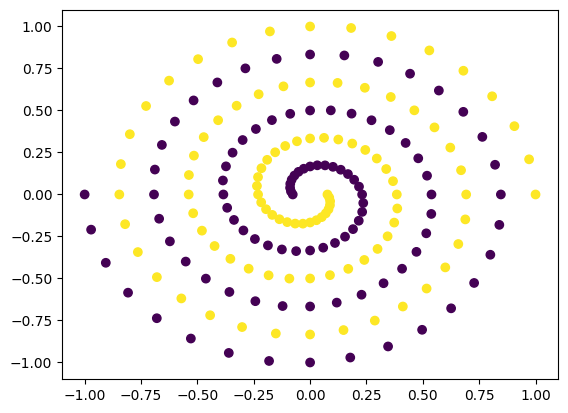

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("spiral.data")
x, y = data[:, :2], data[:, 2]

plt.scatter(x[:,0], x[:,1], c=y)

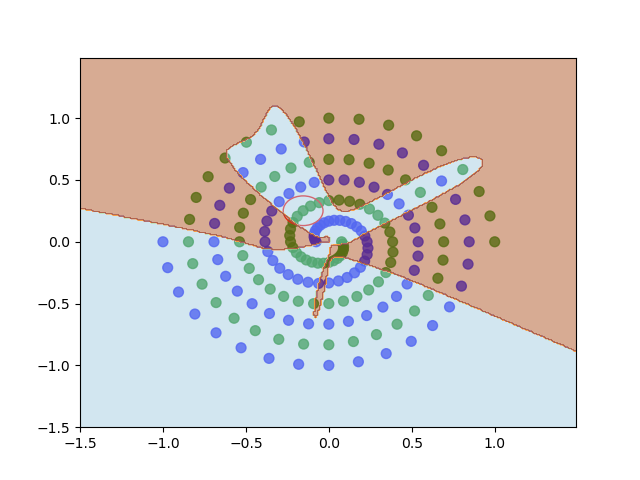

In [42]:
TEMPFILE = "temp1.png"
CENTERS = [[0, 1], [1, 0]]

epochs = 1000
learning_rate = .3
expanding_rate = .99
retracting_rate = 1.1

data = np.loadtxt("spiral.data")
X = data[:, :2]
Y = data[:, 2]
# get the labels
labels = np.array([0 if y == 1 else 1 for y in Y])
alpha_i = np.zeros((len(X),))
b = 0


def snap(x, alpha_i, b, error):
    h = .01  
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def predict(alpha_i, b, x):
    wx = 0
    for j in range(len(X)):
        wx += alpha_i[j] * polynomial(X[j], x,1,60)
    return wx + b

images = []
for _ in range(epochs):
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    ypred = predict(alpha_i, b, x)
    if (ypred > 0 and y > 0) or (ypred < 0 and y < 0):
        if ypred < 1 and ypred > -1:
            alpha_i[i] += y * learning_rate
            alpha_i = alpha_i * retracting_rate           
            b += y * learning_rate * retracting_rate
        else:
            alpha_i = alpha_i * expanding_rate
            b *= expanding_rate
    else:
        alpha_i[i] += y * learning_rate
        alpha_i = alpha_i * expanding_rate
        b += y * learning_rate * expanding_rate
        error = True
final_image = snap(x, alpha_i, b, error)  # 
final_image.save(TEMPFILE) 
from IPython.display import Image
Image(filename=TEMPFILE)
# 
    #images.append(snap(x, alpha_i, b, error))

#images[0].save(
#    'svm_dual.gif',
#    optimize=False,
#    save_all=True,
#    append_images=images[1:],
#    loop=0,
#    duration=100
#)

It's hard to tune the polynomial one, so I trid RBF kernal.

100%|████████████████████████████████████| 10000/10000 [00:13<00:00, 741.59it/s]


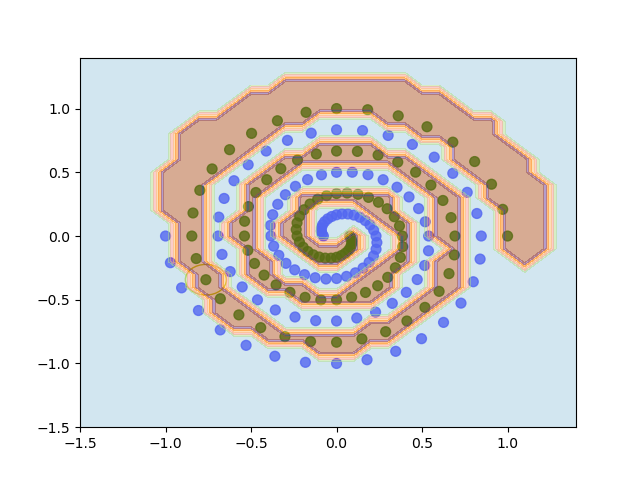

In [37]:
data = np.loadtxt("spiral.data")
X = data[:, :2]
Y = data[:, 2]
# get the labels
labels = np.array([0 if y == 1 else 1 for y in Y])
alpha_i = np.zeros((len(X),))
b = 0

TEMPFILE = "temp22.png"
epochs = 10000
learning_rate = .3
expanding_rate = .99
retracting_rate = 1.1
sigma = .1
images = []
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from tqdm import tqdm

def snap(x, alpha_i, b, error):
    # create a mesh to plot in
    h = .1  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i], sigma))
    return np.array(res)

# Radial Basis Function
def predict(alpha_i, b, x, sigma):
    wx = 0
    for j in range(len(X)):
        wx += alpha_i[j] * np.exp(-np.linalg.norm(X[j]-x)**2 / (2 * sigma**2))
    return wx + b

for _ in tqdm(range(epochs)):
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    ypred = predict(alpha_i, b, x, sigma)
    if (ypred > 0 and y > 0) or (ypred < 0 and y < 0):
        if ypred < 1 and ypred > -1:
            alpha_i[i] += y * learning_rate
            alpha_i = alpha_i * retracting_rate           
            b += y * learning_rate * retracting_rate
        else:
            alpha_i = alpha_i * expanding_rate
            b *= expanding_rate
    else:
        alpha_i[i] += y * learning_rate
        alpha_i = alpha_i * expanding_rate
        b += y * learning_rate * expanding_rate
        error = True

    #images.append(snap(x, alpha_i, b, error))
final_image = snap(x, alpha_i, b, error)  # 
final_image.save(TEMPFILE)  
from IPython.display import Image
Image(filename=TEMPFILE)

#images[0].save(
#    'spectral2.gif',
#    optimize=False,
#    save_all=True,
#    append_images=images[1:],
#    loop=0,
#    duration=100
#)

It took me forever to generate gif pic, so I try to only display the final one.